In [1]:
from mlchecks.base import Dataset
from sklearn.ensemble import AdaBoostClassifier
from sklearn.datasets import load_iris
iris = load_iris(as_frame=True)
clf = AdaBoostClassifier()
frame = iris.frame
X = iris.data
Y = iris.target
ds = Dataset(frame, 
            features=iris.feature_names,
            label='target')
clf.fit(X, Y)

/Users/jonthanliberman/Documents/MLChecks/mlchecks/base/dataset.py:54: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  self._features = features
/Users/jonthanliberman/Documents/MLChecks/mlchecks/base/dataset.py:66: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  self._cat_features = self.infer_categorical_features()


AdaBoostClassifier()

In [2]:
from mlchecks.checks.performance import ConfusionMatrixReport

In [3]:
check = ConfusionMatrixReport()

{}

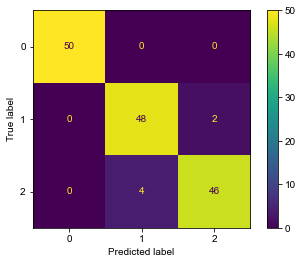

In [4]:
check.run(ds, clf)